# Commodity Contrarian Strategies: Quintiles vs Full Universe Comparison

This notebook compares two daily contrarian trading strategies:
1. **Quintiles Strategy**: Long only bottom quintile (worst 20% performers)
2. **Full Universe Strategy**: Long all commodities with negative lookback performance

## Key Objectives
- Compare risk-adjusted performance between concentrated (quintiles) vs diversified (full universe) approaches
- Analyze position characteristics and turnover
- Evaluate the impact of concentration on strategy performance
- Provide actionable insights for commodity trading

In [1]:
# Import required libraries
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set up paths
sys.path.append('../../modules')
sys.path.append('../..')

# Import our custom modules
from commodity_quintile_strategy import (
    run_commodity_strategies_comparison, 
    save_commodity_comparison_results
)
from commodity_universe_comparison import (
    calculate_performance_metrics,
    analyze_position_characteristics,
    create_comparison_visualizations,
    print_detailed_comparison_table,
    generate_summary_report
)
# Import from modules directory explicitly
sys.path.append('../../modules')
from commodities_backtest import download_and_save_commodities_data

# Set plotting style
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")
print(f"Analysis date: {pd.Timestamp.now().date()}")

Libraries imported successfully!
Analysis date: 2025-08-12


## 1. Data Preparation

Load commodity futures data for our analysis. We'll use the same 15 liquid commodity futures from the existing setup.

In [2]:
# Define commodity futures tickers (same as main backtest)
tickers = [
    # Energy (5)
    'CL=F',  # Crude Oil WTI
    'NG=F',  # Natural Gas 
    'BZ=F',  # Brent Crude Oil
    'RB=F',  # RBOB Gasoline
    'HO=F',  # Heating Oil
    
    # Precious Metals (2)
    'GC=F',  # Gold 
    'SI=F',  # Silver
    
    # Industrial Metals (2)
    'HG=F',  # Copper
    'PA=F',  # Palladium
    
    # Agriculture - Grains (3)
    'ZC=F',  # Corn
    'ZW=F',  # Wheat (Chicago)
    'ZS=F',  # Soybeans
    
    # Soft Commodities (3)
    'SB=F',  # Sugar #11
    'CT=F',  # Cotton
    'CC=F'   # Cocoa
]

print(f"Loading data for {len(tickers)} commodity futures...")
print(f"Tickers: {tickers}")

# Download and cache data (uses existing caching system)
data_dict = download_and_save_commodities_data(tickers, data_dir='../data/raw')

print(f"\nData loaded successfully!")
print(f"Available commodities: {len(data_dict)}")

# Display data summary
for ticker, data in data_dict.items():
    print(f"{ticker}: {len(data)} days, {data.index[0].date()} to {data.index[-1].date()}")

Loading data for 15 commodity futures...
Tickers: ['CL=F', 'NG=F', 'BZ=F', 'RB=F', 'HO=F', 'GC=F', 'SI=F', 'HG=F', 'PA=F', 'ZC=F', 'ZW=F', 'ZS=F', 'SB=F', 'CT=F', 'CC=F']
Loading cached data for CL=F
Loading cached data for NG=F
Loading cached data for BZ=F
Loading cached data for RB=F
Loading cached data for HO=F
Loading cached data for GC=F
Loading cached data for SI=F
Loading cached data for HG=F
Loading cached data for PA=F
Loading cached data for ZC=F
Loading cached data for ZW=F
Loading cached data for ZS=F
Loading cached data for SB=F
Loading cached data for CT=F
Loading cached data for CC=F

Data loaded successfully!
Available commodities: 15
CL=F: 3924 days, 2010-01-04 to 2025-08-08
NG=F: 3925 days, 2010-01-04 to 2025-08-08
BZ=F: 3893 days, 2010-01-04 to 2025-08-08
RB=F: 3924 days, 2010-01-04 to 2025-08-08
HO=F: 3924 days, 2010-01-04 to 2025-08-08
GC=F: 3923 days, 2010-01-04 to 2025-08-08
SI=F: 3923 days, 2010-01-04 to 2025-08-08
HG=F: 3924 days, 2010-01-04 to 2025-08-08
PA=F:

## 2. Strategy Configuration

Set up the parameters for our comparison analysis.

In [3]:
# Strategy parameters
LOOKBACK_DAYS = 20  # Days for performance lookback (1 month)
APPLY_TRANSACTION_COSTS = True
VOLUME_TIER = 1  # IBKR retail tier

print("STRATEGY CONFIGURATION")
print("=====================")
print(f"Lookback Period: {LOOKBACK_DAYS} days")
print(f"Transaction Costs: {'Enabled' if APPLY_TRANSACTION_COSTS else 'Disabled'}")
print(f"IBKR Volume Tier: {VOLUME_TIER} (Retail)")
print(f"\nStrategy Logic:")
print(f"• Quintiles: Long bottom 20% performers only")
print(f"• Full Universe: Long all commodities with negative lookback performance")
print(f"• Both strategies use equal weighting within selected positions")
print(f"• Bias prevention: Uses shift(1) for all signals")

STRATEGY CONFIGURATION
Lookback Period: 20 days
Transaction Costs: Enabled
IBKR Volume Tier: 1 (Retail)

Strategy Logic:
• Quintiles: Long bottom 20% performers only
• Full Universe: Long all commodities with negative lookback performance
• Both strategies use equal weighting within selected positions
• Bias prevention: Uses shift(1) for all signals


## 3. Run Strategy Comparison

Execute both strategies and calculate results.

In [4]:
# Run both strategies
print("Executing strategy comparison...\n")

results_dict, positions_dict = run_commodity_strategies_comparison(
    data_dict=data_dict,
    lookback_days=LOOKBACK_DAYS,
    apply_transaction_costs=APPLY_TRANSACTION_COSTS,
    volume_tier=VOLUME_TIER
)

print("\n" + "="*60)
print("STRATEGY EXECUTION COMPLETED")
print("="*60)

# Display basic results
for strategy_name, results in results_dict.items():
    total_return = results['cumulative_returns'].iloc[-1] - 1
    days = len(results['strategy_returns'].dropna())
    print(f"{strategy_name.upper()}:")
    print(f"  • Total Return: {total_return:.1%}")
    print(f"  • Trading Days: {days}")
    print(f"  • Data Period: {results.index[0].date()} to {results.index[-1].date()}")
    print()

# Save results to disk
save_commodity_comparison_results(results_dict, positions_dict)
print("Results saved to disk for future analysis.")

Executing strategy comparison...

Running commodity strategies comparison...
Lookback days: 20
Apply transaction costs: True
Volume tier: 1
Daily commodity data: 3925 days, 15 commodities

Running quintiles strategy (bottom 20% only)...
Running full universe strategy (all negative performers)...

Strategies completed successfully!
Quintiles final return: 2.8291
Full universe final return: 6.4047

STRATEGY EXECUTION COMPLETED
QUINTILES:
  • Total Return: 182.9%
  • Trading Days: 3925
  • Data Period: 2010-01-04 to 2025-08-08

FULL_UNIVERSE:
  • Total Return: 540.5%
  • Trading Days: 3925
  • Data Period: 2010-01-04 to 2025-08-08

✓ Saved quintiles results to: ../commodities/data/results/quintiles_comparison/quintiles_results.parquet
✓ Saved full_universe results to: ../commodities/data/results/quintiles_comparison/full_universe_results.parquet
✓ Saved quintiles positions to: ../commodities/data/results/quintiles_comparison/quintiles_positions.parquet
✓ Saved full_universe positions to: 

## 4. Performance Metrics Calculation

Calculate comprehensive performance metrics for both strategies.

In [5]:
# Calculate performance metrics for both strategies
print("Calculating performance metrics...\n")

metrics_dict = {}
for strategy_name, results in results_dict.items():
    metrics = calculate_performance_metrics(results, strategy_name)
    metrics_dict[strategy_name] = metrics
    print(f"{strategy_name.upper()} METRICS CALCULATED")

# Calculate position characteristics
print("\nAnalyzing position characteristics...")
positions_analysis = analyze_position_characteristics(positions_dict)

print("\nAll metrics calculated successfully!")

Calculating performance metrics...

QUINTILES METRICS CALCULATED
FULL_UNIVERSE METRICS CALCULATED

Analyzing position characteristics...

All metrics calculated successfully!


## 5. Visual Comparison

Create comprehensive visualizations to compare the strategies.

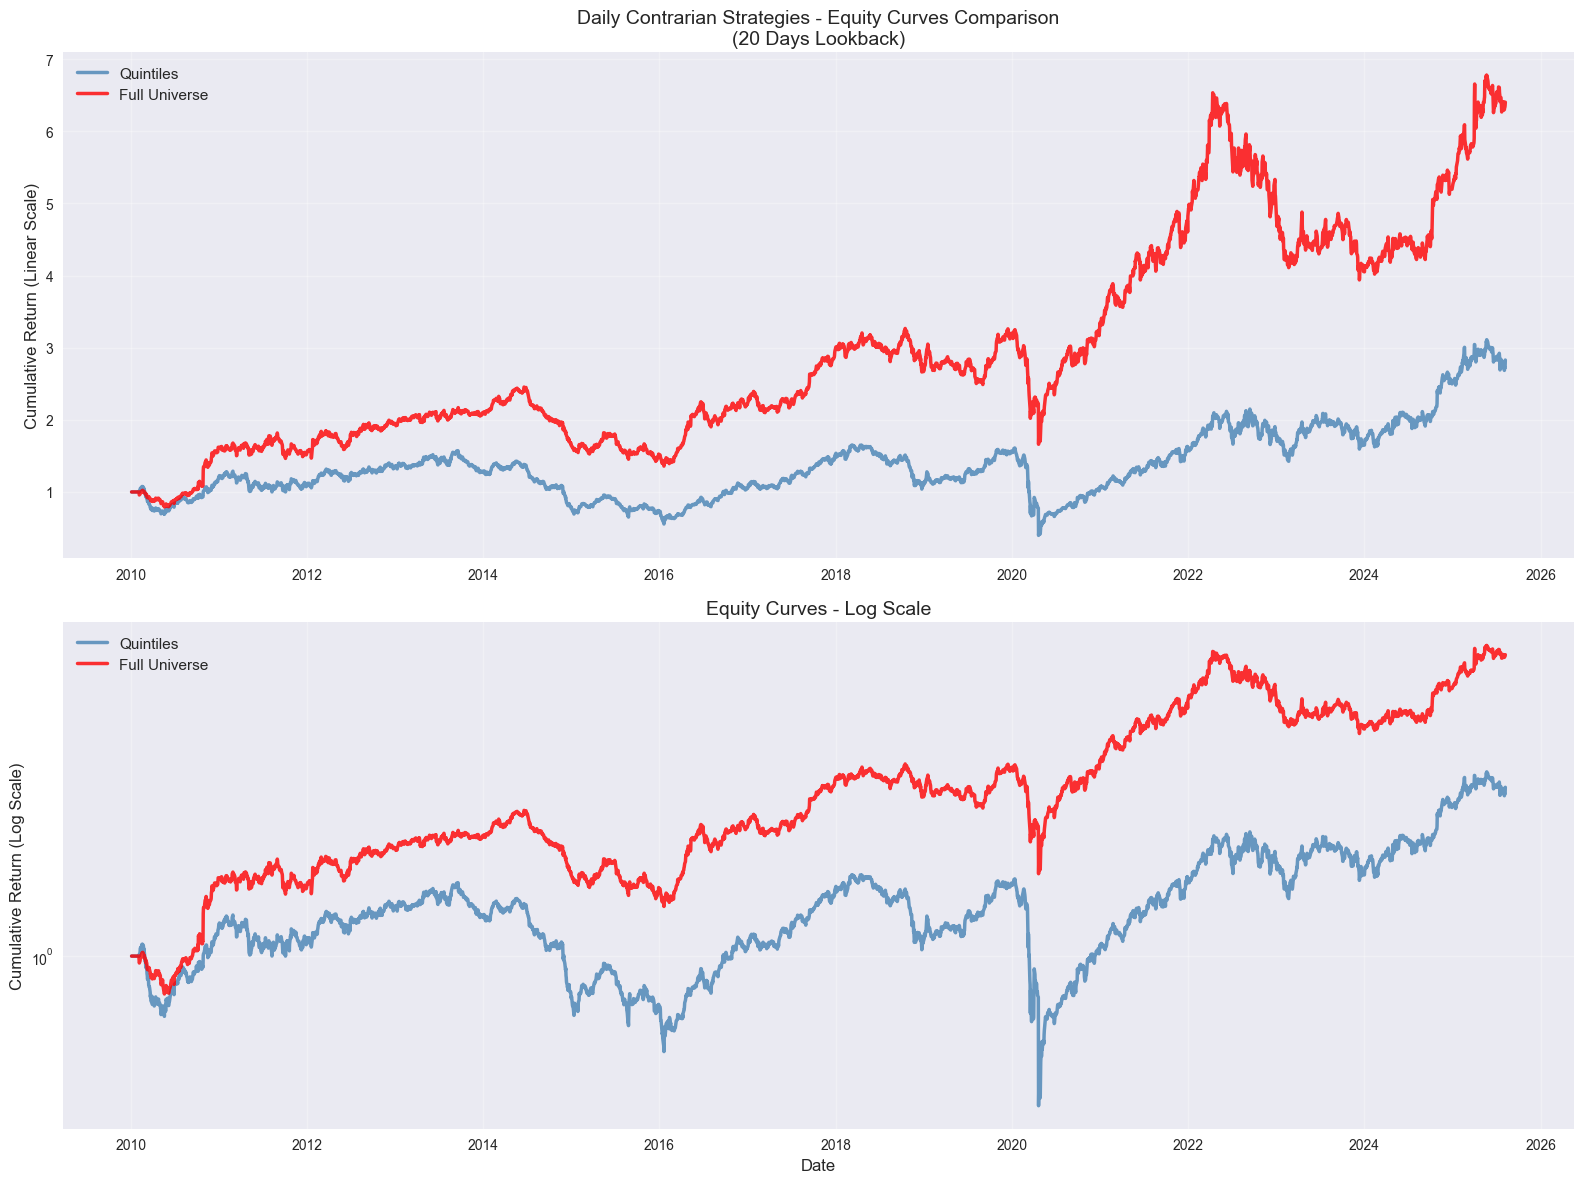

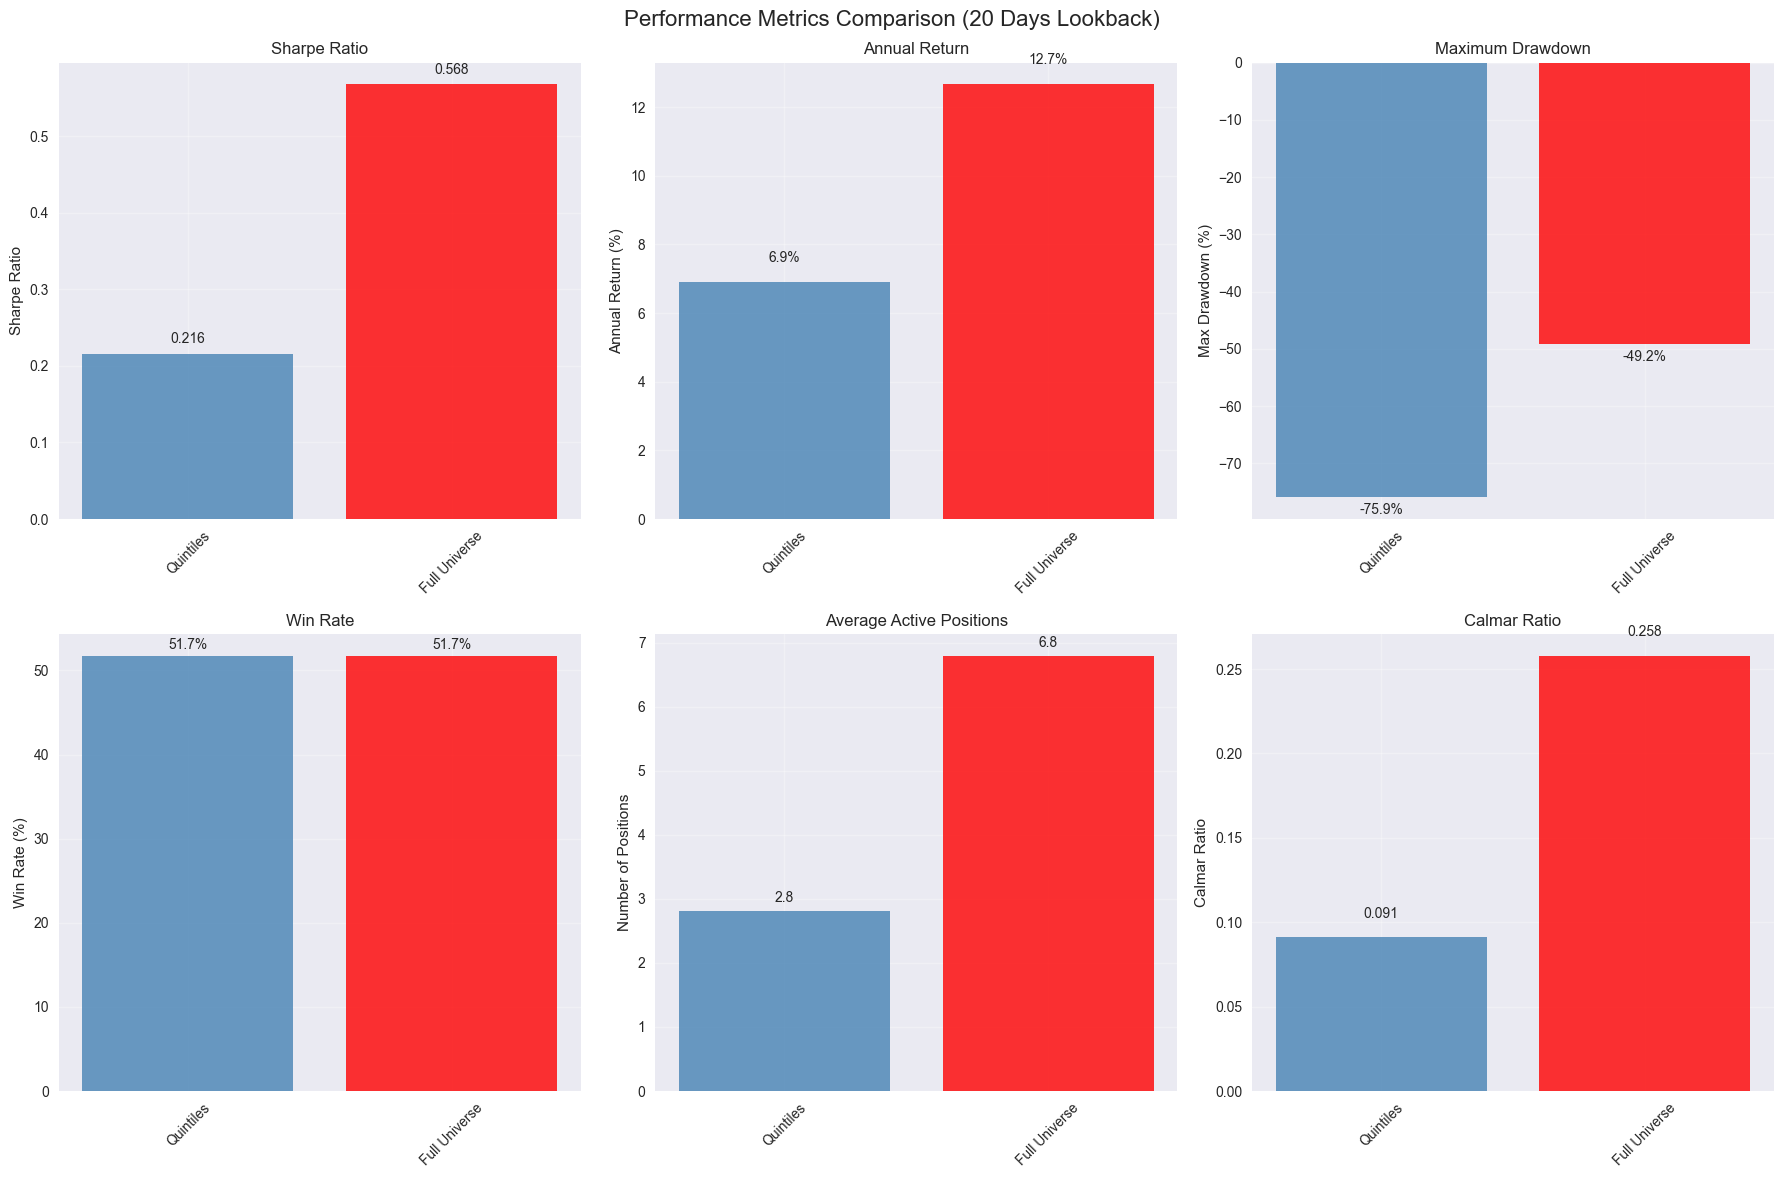

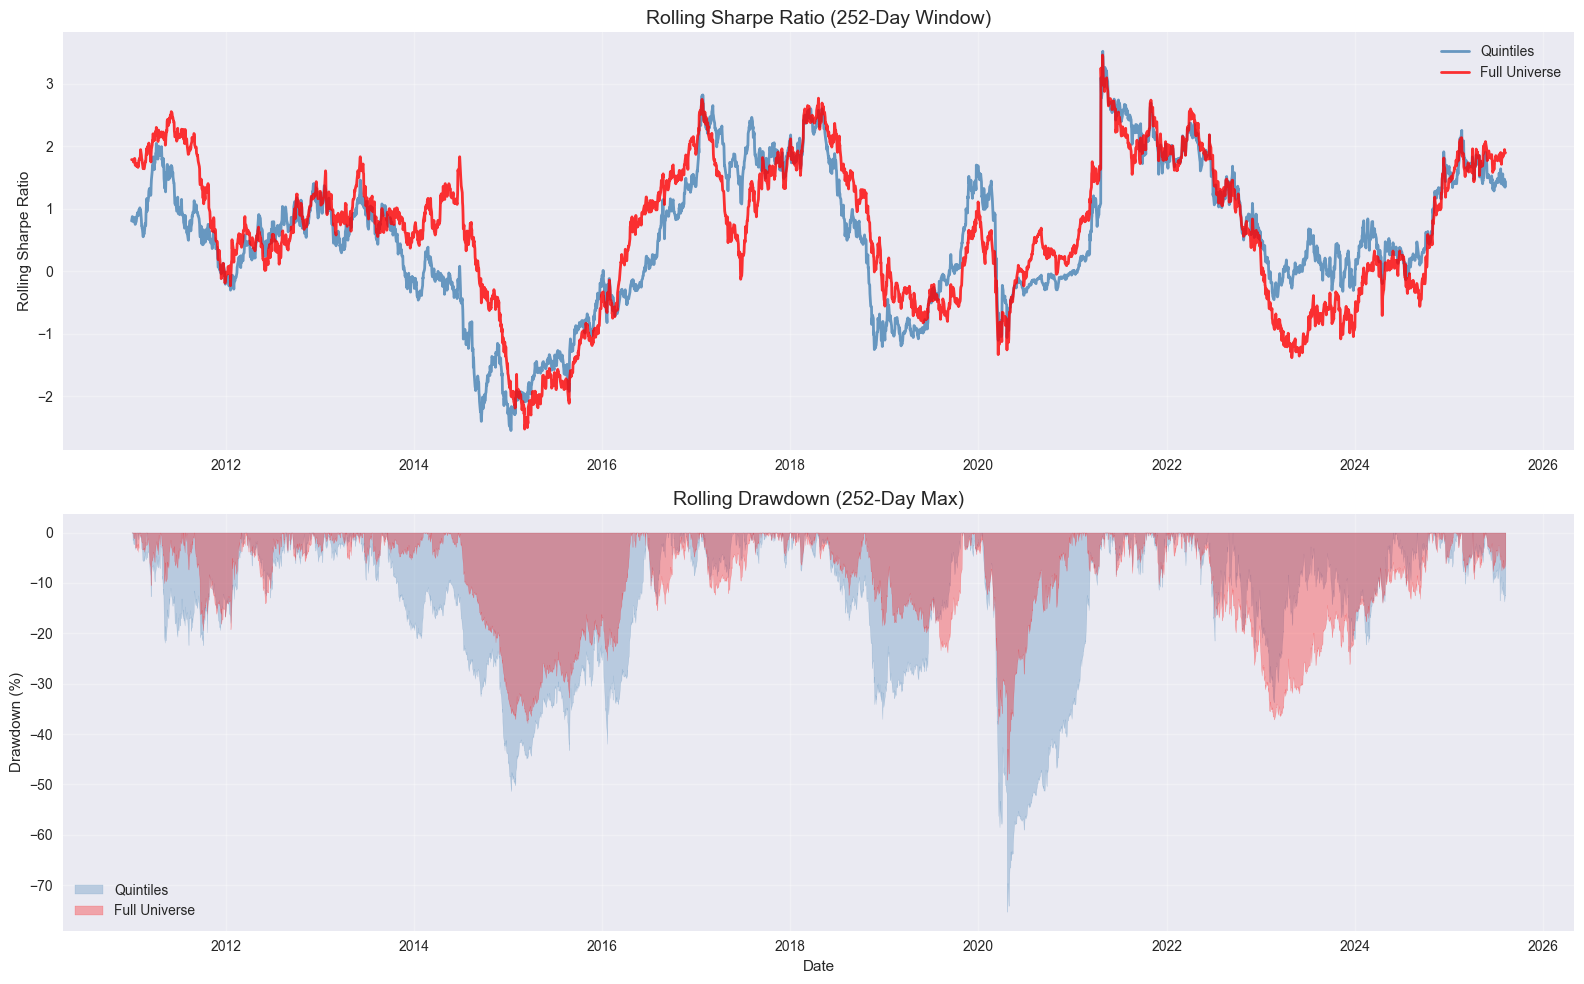

In [6]:
# Create comprehensive comparison visualizations
create_comparison_visualizations(
    results_dict=results_dict,
    metrics_dict=metrics_dict,
    positions_analysis=positions_analysis,
    lookback_days=LOOKBACK_DAYS
)

## 6. Detailed Performance Analysis

### 6.1 Returns Distribution Analysis

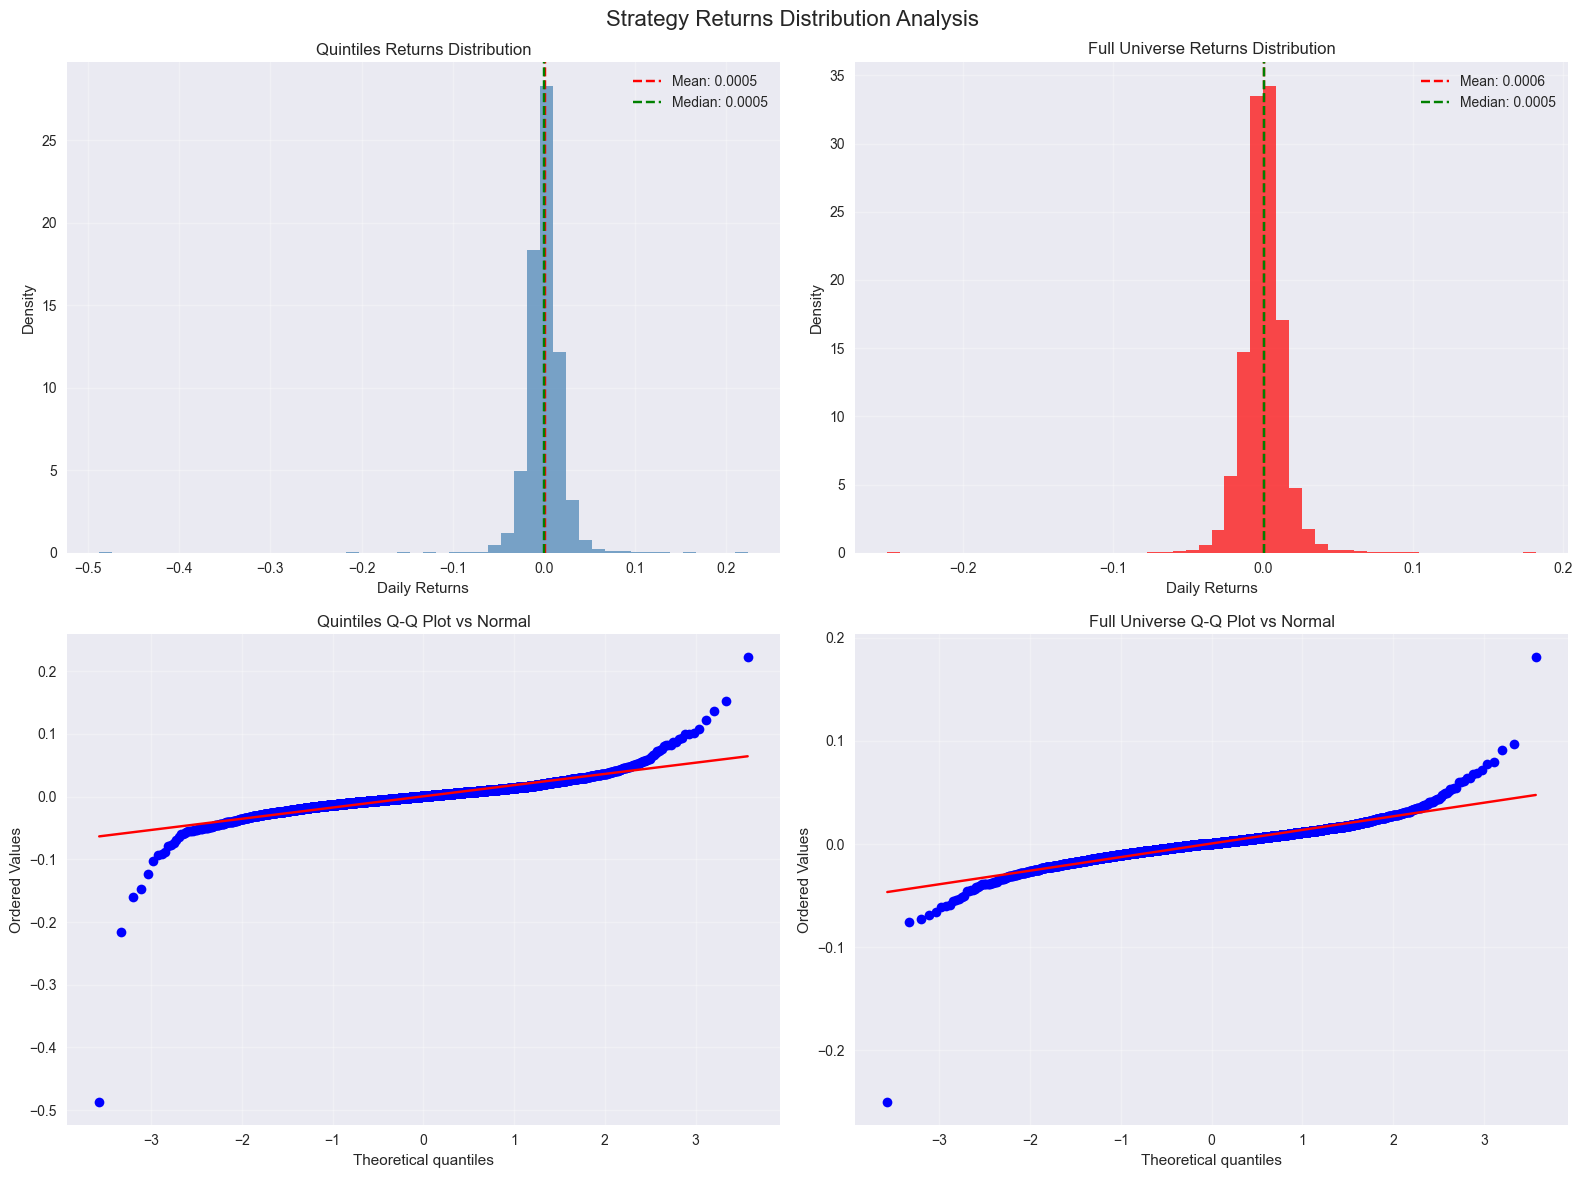


RETURNS DISTRIBUTION STATISTICS

QUINTILES:
  Mean: 0.000485
  Median: 0.000471
  Std: 0.020182
  Skewness: -3.448
  Kurtosis: 99.250
  Min: -0.4877
  Max: 0.2232

FULL_UNIVERSE:
  Mean: 0.000573
  Median: 0.000480
  Std: 0.014054
  Skewness: -0.694
  Kurtosis: 36.047
  Min: -0.2504
  Max: 0.1817


In [7]:
# Compare return distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Strategy Returns Distribution Analysis', fontsize=16)

colors = ['steelblue', 'red']
strategy_names = list(results_dict.keys())

# Histograms
for i, (strategy_name, results) in enumerate(results_dict.items()):
    returns = results['strategy_returns'].dropna()
    
    axes[0, i].hist(returns, bins=50, alpha=0.7, color=colors[i], density=True)
    axes[0, i].axvline(returns.mean(), color='red', linestyle='--', 
                      label=f'Mean: {returns.mean():.4f}')
    axes[0, i].axvline(returns.median(), color='green', linestyle='--', 
                      label=f'Median: {returns.median():.4f}')
    axes[0, i].set_title(f'{strategy_name.replace("_", " ").title()} Returns Distribution')
    axes[0, i].set_xlabel('Daily Returns')
    axes[0, i].set_ylabel('Density')
    axes[0, i].legend()
    axes[0, i].grid(True, alpha=0.3)

# Q-Q plots against normal distribution
from scipy import stats

for i, (strategy_name, results) in enumerate(results_dict.items()):
    returns = results['strategy_returns'].dropna()
    
    stats.probplot(returns, dist="norm", plot=axes[1, i])
    axes[1, i].set_title(f'{strategy_name.replace("_", " ").title()} Q-Q Plot vs Normal')
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print distribution statistics
print("\nRETURNS DISTRIBUTION STATISTICS")
print("="*50)
for strategy_name, results in results_dict.items():
    returns = results['strategy_returns'].dropna()
    print(f"\n{strategy_name.upper()}:")
    print(f"  Mean: {returns.mean():.6f}")
    print(f"  Median: {returns.median():.6f}")
    print(f"  Std: {returns.std():.6f}")
    print(f"  Skewness: {returns.skew():.3f}")
    print(f"  Kurtosis: {returns.kurtosis():.3f}")
    print(f"  Min: {returns.min():.4f}")
    print(f"  Max: {returns.max():.4f}")

### 6.2 Monthly Performance Analysis

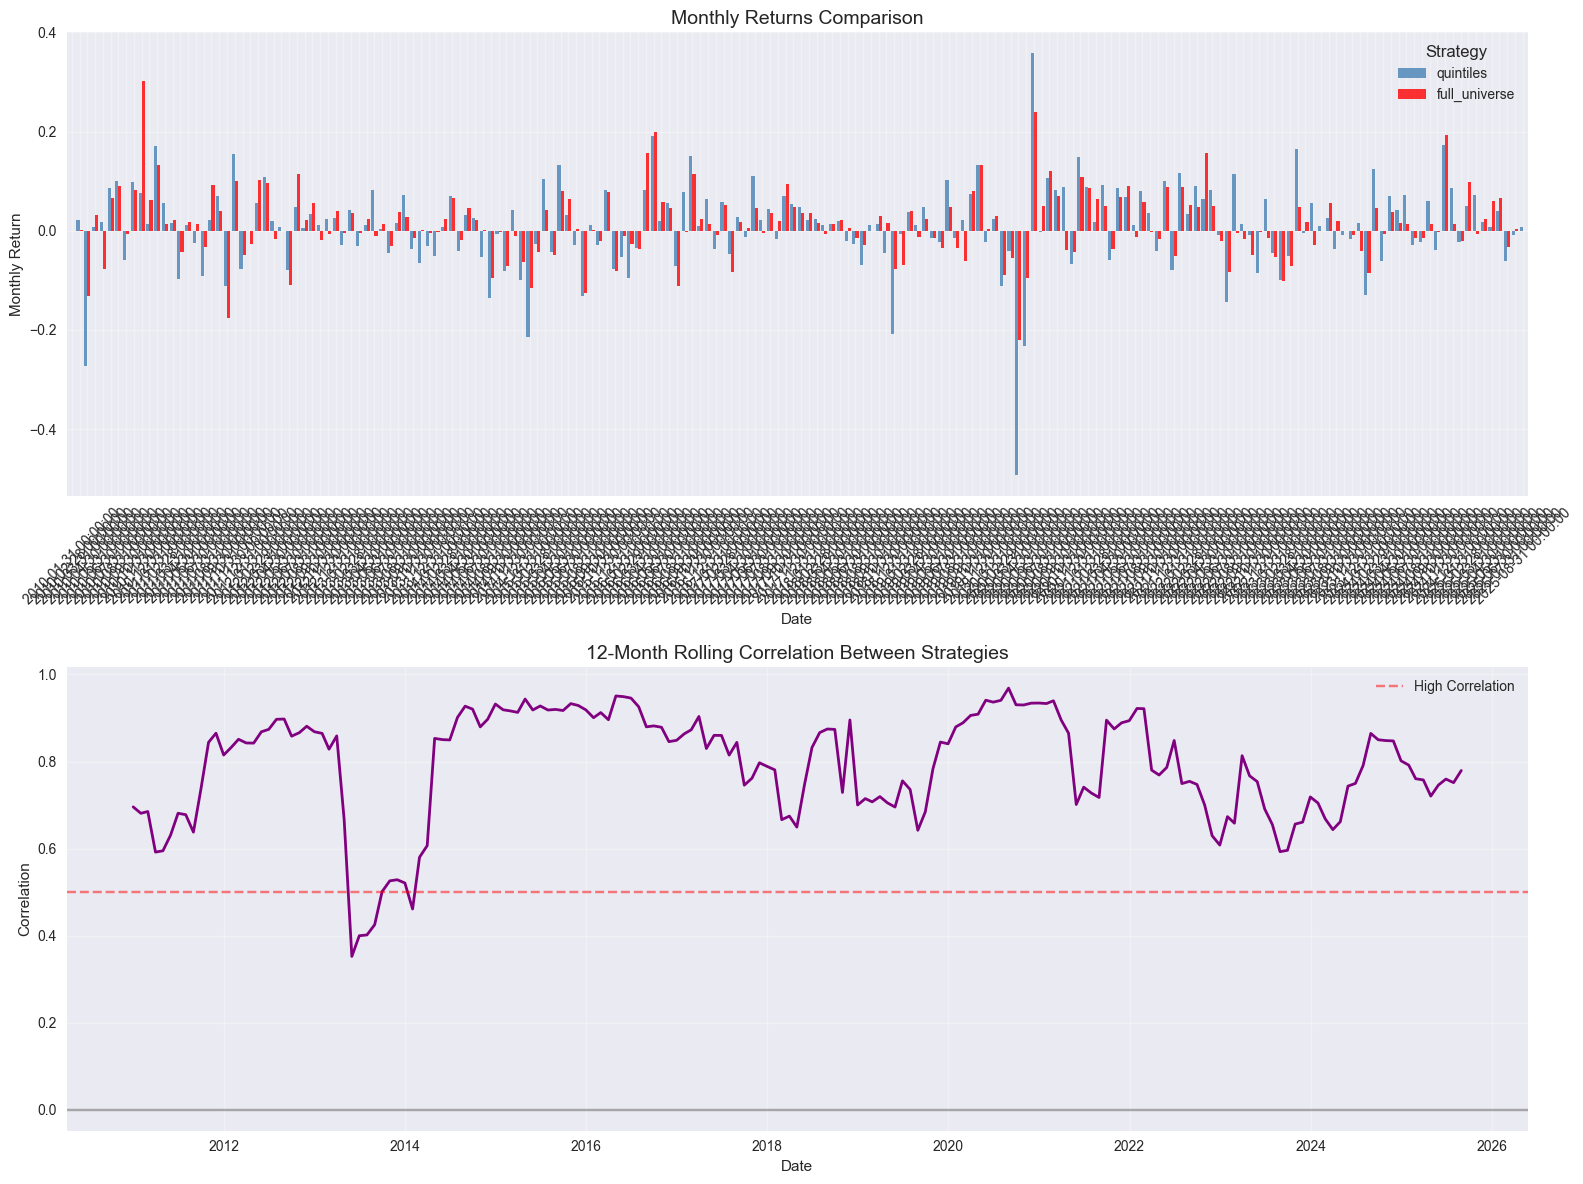


MONTHLY PERFORMANCE STATISTICS

QUINTILES:
  Monthly Win Rate: 59.6%
  Avg Winning Month: 5.99%
  Avg Losing Month: -6.53%
  Best Month: 35.76%
  Worst Month: -49.25%

FULL_UNIVERSE:
  Monthly Win Rate: 53.7%
  Avg Winning Month: 5.68%
  Avg Losing Month: -4.01%
  Best Month: 30.26%
  Worst Month: -22.14%

Overall correlation: 0.804


In [8]:
# Monthly performance analysis
monthly_performance = {}

for strategy_name, results in results_dict.items():
    monthly_returns = results['strategy_returns'].resample('M').apply(lambda x: (1 + x).prod() - 1)
    monthly_performance[strategy_name] = monthly_returns

# Create monthly performance DataFrame
monthly_df = pd.DataFrame(monthly_performance)

# Monthly performance visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Monthly returns bar chart
monthly_df.plot(kind='bar', ax=ax1, color=colors, alpha=0.8, width=0.8)
ax1.set_title('Monthly Returns Comparison', fontsize=14)
ax1.set_ylabel('Monthly Return')
ax1.legend(title='Strategy')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Rolling correlation between strategies
rolling_corr = monthly_df.iloc[:, 0].rolling(12).corr(monthly_df.iloc[:, 1])
ax2.plot(rolling_corr.index, rolling_corr, color='purple', linewidth=2)
ax2.set_title('12-Month Rolling Correlation Between Strategies', fontsize=14)
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Date')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax2.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='High Correlation')
ax2.legend()

plt.tight_layout()
plt.show()

# Print monthly statistics
print("\nMONTHLY PERFORMANCE STATISTICS")
print("="*50)
for strategy_name in monthly_df.columns:
    monthly_rets = monthly_df[strategy_name].dropna()
    win_rate = (monthly_rets > 0).mean()
    avg_win = monthly_rets[monthly_rets > 0].mean()
    avg_loss = monthly_rets[monthly_rets < 0].mean()
    
    print(f"\n{strategy_name.upper()}:")
    print(f"  Monthly Win Rate: {win_rate:.1%}")
    print(f"  Avg Winning Month: {avg_win:.2%}")
    print(f"  Avg Losing Month: {avg_loss:.2%}")
    print(f"  Best Month: {monthly_rets.max():.2%}")
    print(f"  Worst Month: {monthly_rets.min():.2%}")

print(f"\nOverall correlation: {monthly_df.corr().iloc[0,1]:.3f}")

### 6.3 Position Analysis

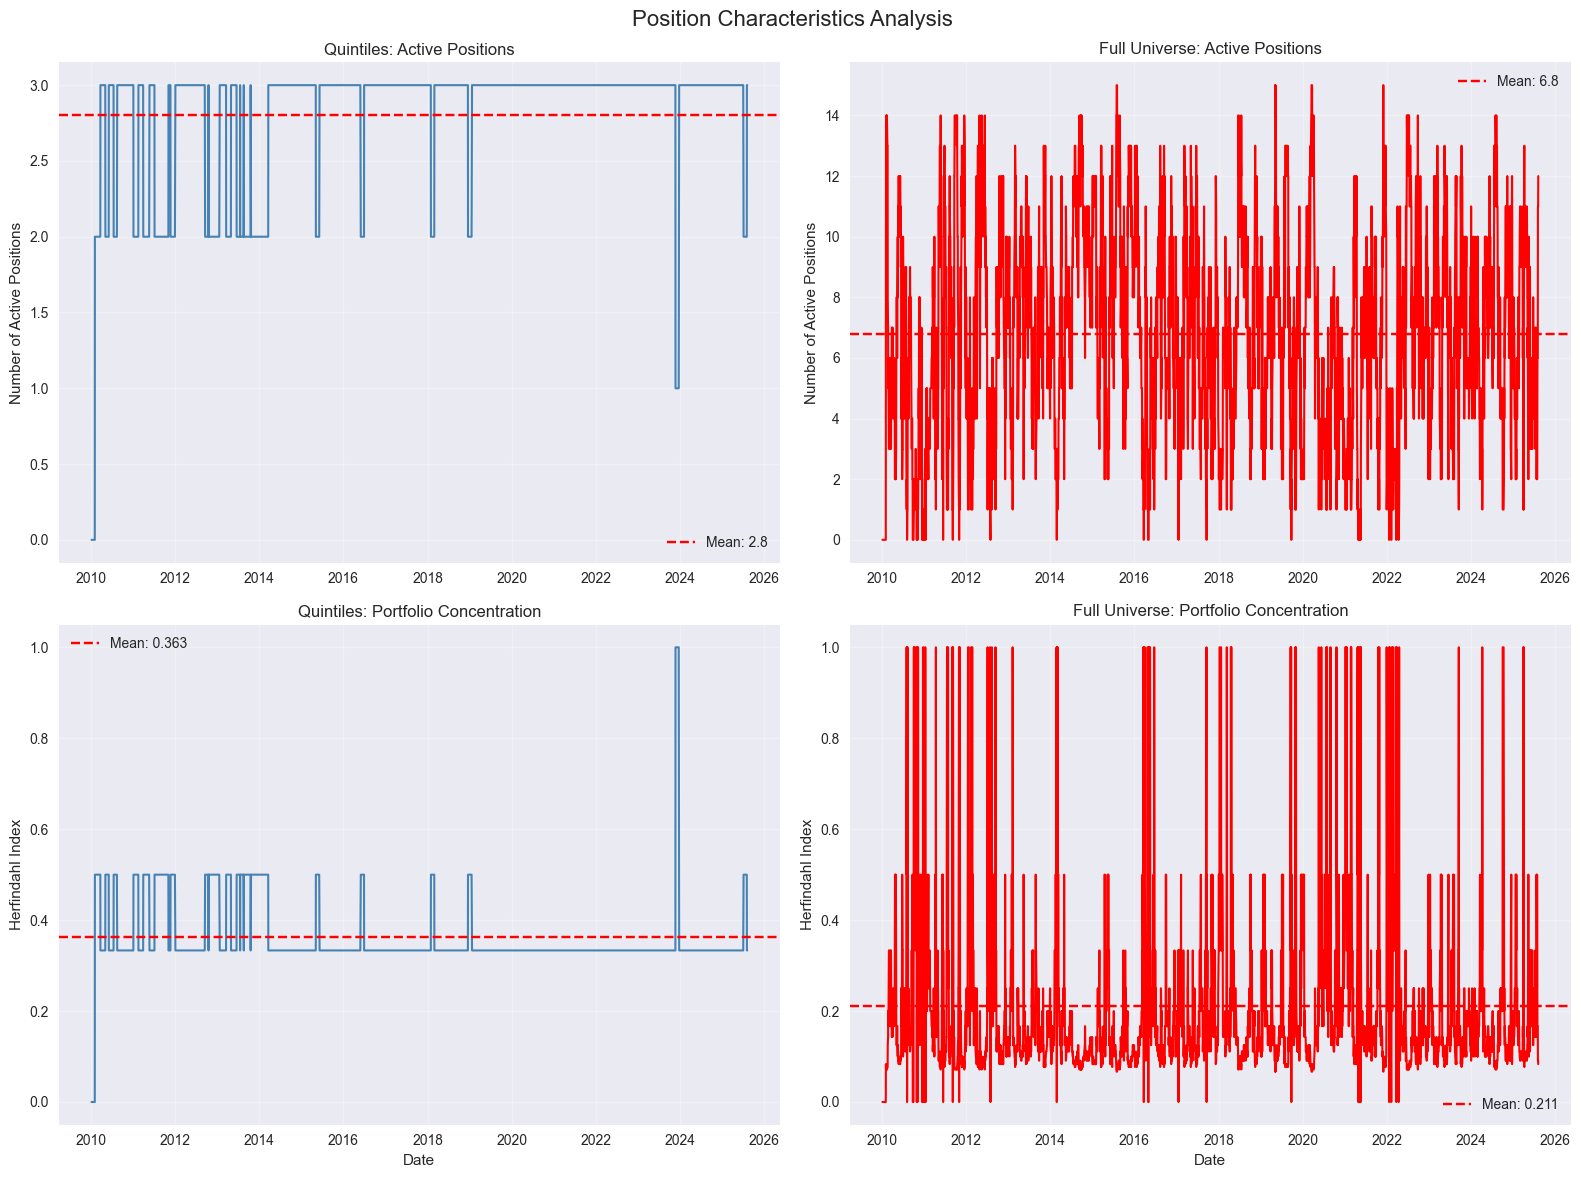


COMMODITY-LEVEL POSITION ANALYSIS

QUINTILES:
  Most Selected Commodities:
    NG=F: 29.5% of days
    SB=F: 25.4% of days
    ZW=F: 23.5% of days
    CC=F: 23.0% of days
    SI=F: 20.4% of days
  Least Selected Commodities:
    ZS=F: 15.9% of days
    HO=F: 12.6% of days
    BZ=F: 12.1% of days
    HG=F: 12.0% of days
    GC=F: 11.2% of days

FULL_UNIVERSE:
  Most Selected Commodities:
    SB=F: 51.5% of days
    ZW=F: 49.8% of days
    NG=F: 47.6% of days
    SI=F: 47.3% of days
    CT=F: 45.8% of days
  Least Selected Commodities:
    RB=F: 44.6% of days
    CC=F: 44.5% of days
    GC=F: 43.8% of days
    PA=F: 41.1% of days
    BZ=F: 36.9% of days


In [9]:
# Analyze position characteristics over time
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Position Characteristics Analysis', fontsize=16)

# Active positions over time
for i, (strategy_name, positions) in enumerate(positions_dict.items()):
    active_positions = (positions > 0).sum(axis=1)
    axes[0, i].plot(active_positions.index, active_positions, color=colors[i], linewidth=1.5)
    axes[0, i].set_title(f'{strategy_name.replace("_", " ").title()}: Active Positions')
    axes[0, i].set_ylabel('Number of Active Positions')
    axes[0, i].grid(True, alpha=0.3)
    axes[0, i].axhline(y=active_positions.mean(), color='red', linestyle='--', 
                      label=f'Mean: {active_positions.mean():.1f}')
    axes[0, i].legend()

# Position concentration (Herfindahl index) over time
for i, (strategy_name, positions) in enumerate(positions_dict.items()):
    position_weights = positions.abs()
    row_sums = position_weights.sum(axis=1)
    normalized_weights = position_weights.div(row_sums, axis=0).fillna(0)
    herfindahl = (normalized_weights ** 2).sum(axis=1)
    
    axes[1, i].plot(herfindahl.index, herfindahl, color=colors[i], linewidth=1.5)
    axes[1, i].set_title(f'{strategy_name.replace("_", " ").title()}: Portfolio Concentration')
    axes[1, i].set_ylabel('Herfindahl Index')
    axes[1, i].set_xlabel('Date')
    axes[1, i].grid(True, alpha=0.3)
    axes[1, i].axhline(y=herfindahl.mean(), color='red', linestyle='--', 
                      label=f'Mean: {herfindahl.mean():.3f}')
    axes[1, i].legend()

plt.tight_layout()
plt.show()

# Commodity-level analysis
print("\nCOMMODITY-LEVEL POSITION ANALYSIS")
print("="*50)

for strategy_name, positions in positions_dict.items():
    print(f"\n{strategy_name.upper()}:")
    
    # Calculate frequency of each commodity being selected
    selection_freq = (positions > 0).mean().sort_values(ascending=False)
    
    print("  Most Selected Commodities:")
    for ticker, freq in selection_freq.head(5).items():
        print(f"    {ticker}: {freq:.1%} of days")
    
    print("  Least Selected Commodities:")
    for ticker, freq in selection_freq.tail(5).items():
        print(f"    {ticker}: {freq:.1%} of days")

## 7. Transaction Cost Analysis

Analyze the impact of transaction costs on both strategies.

TRANSACTION COST ANALYSIS


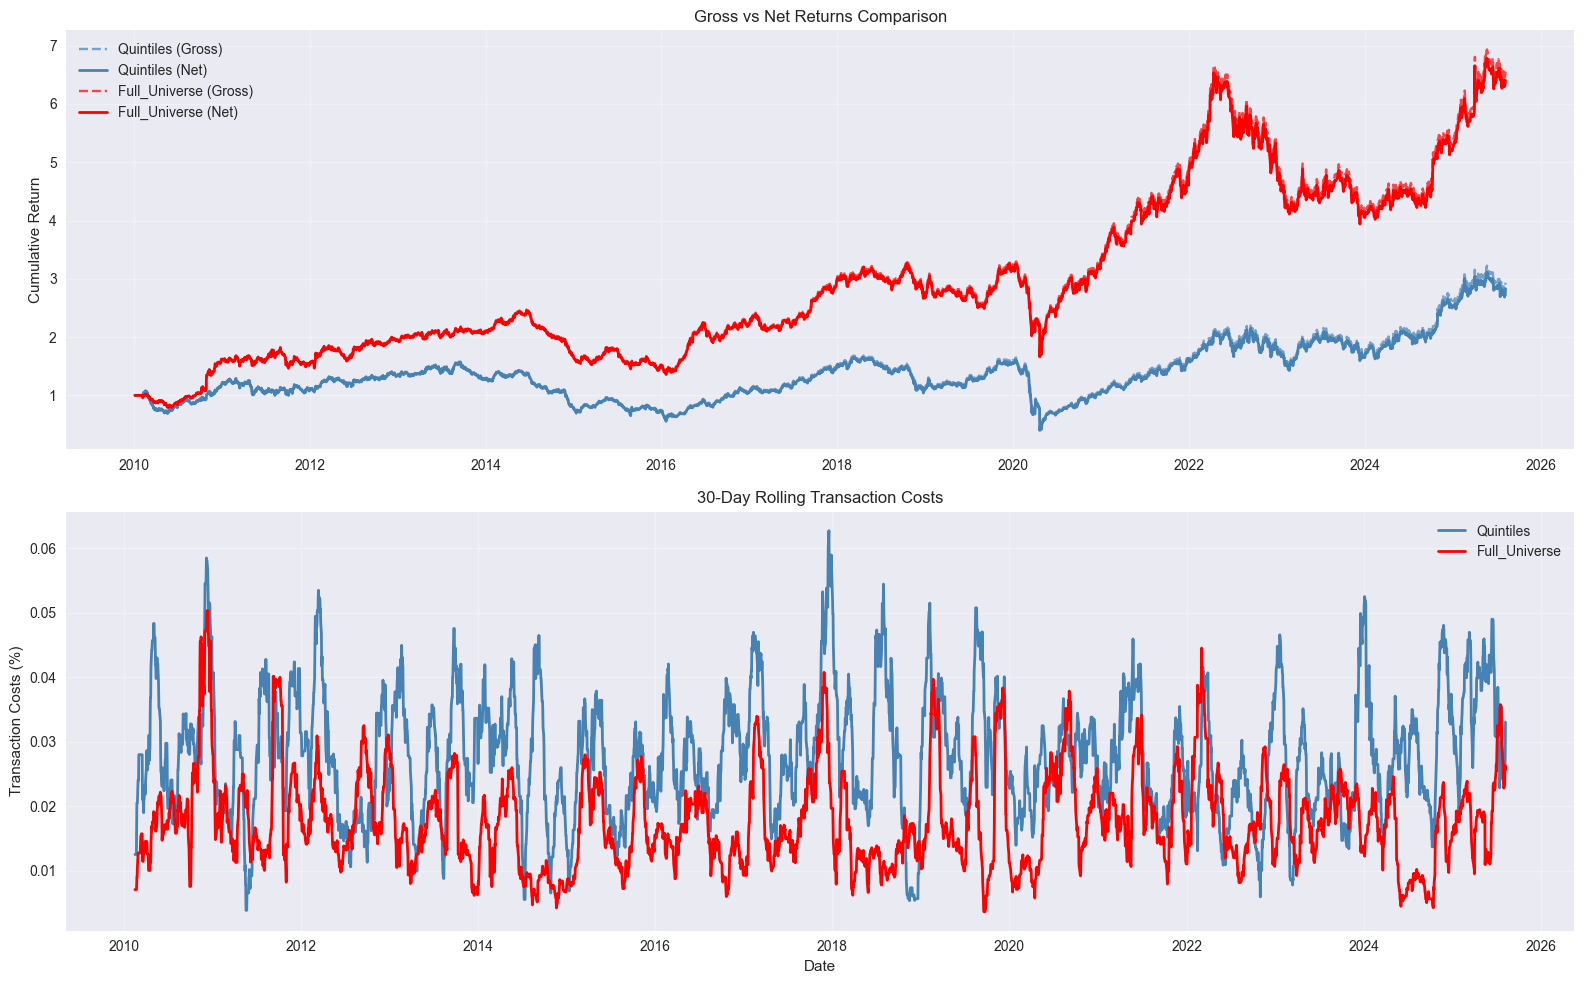


TRANSACTION COST STATISTICS:

QUINTILES:
  Total Transaction Costs: 0.0364 (3.64%)
  Average Daily Cost: 0.000009 (0.0009%)
  Cost Drag on Return: 10.47%
  Days with Costs: 1755 / 3925 (44.7%)

FULL_UNIVERSE:
  Total Transaction Costs: 0.0231 (2.31%)
  Average Daily Cost: 0.000006 (0.0006%)
  Cost Drag on Return: 14.99%
  Days with Costs: 1989 / 3925 (50.7%)


In [10]:
if APPLY_TRANSACTION_COSTS:
    print("TRANSACTION COST ANALYSIS")
    print("="*40)
    
    fig, axes = plt.subplots(2, 1, figsize=(16, 10))
    
    # Plot gross vs net returns
    for i, (strategy_name, results) in enumerate(results_dict.items()):
        if 'strategy_returns_gross' in results.columns:
            # Cumulative gross returns
            gross_cumulative = (1 + results['strategy_returns_gross']).cumprod()
            net_cumulative = results['cumulative_returns']
            
            axes[0].plot(gross_cumulative.index, gross_cumulative, 
                        color=colors[i], linestyle='--', alpha=0.7,
                        label=f'{strategy_name.title()} (Gross)')
            axes[0].plot(net_cumulative.index, net_cumulative, 
                        color=colors[i], linewidth=2,
                        label=f'{strategy_name.title()} (Net)')
    
    axes[0].set_title('Gross vs Net Returns Comparison')
    axes[0].set_ylabel('Cumulative Return')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Plot transaction costs over time
    for i, (strategy_name, results) in enumerate(results_dict.items()):
        if 'transaction_costs' in results.columns:
            # Rolling 30-day sum of transaction costs
            rolling_costs = results['transaction_costs'].rolling(30).sum()
            axes[1].plot(rolling_costs.index, rolling_costs * 100, 
                        color=colors[i], linewidth=2,
                        label=f'{strategy_name.title()}')
    
    axes[1].set_title('30-Day Rolling Transaction Costs')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Transaction Costs (%)')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate cost statistics
    print("\nTRANSACTION COST STATISTICS:")
    for strategy_name, results in results_dict.items():
        if 'transaction_costs' in results.columns:
            costs = results['transaction_costs']
            gross_return = (1 + results['strategy_returns_gross']).cumprod().iloc[-1] - 1
            net_return = results['cumulative_returns'].iloc[-1] - 1
            cost_drag = gross_return - net_return
            
            print(f"\n{strategy_name.upper()}:")
            print(f"  Total Transaction Costs: {costs.sum():.4f} ({costs.sum()*100:.2f}%)")
            print(f"  Average Daily Cost: {costs.mean():.6f} ({costs.mean()*100:.4f}%)")
            print(f"  Cost Drag on Return: {cost_drag:.2%}")
            print(f"  Days with Costs: {(costs > 0).sum()} / {len(costs)} ({(costs > 0).mean():.1%})")
            
else:
    print("Transaction costs analysis skipped (costs not applied).")

## 8. Detailed Comparison Table

Print comprehensive comparison metrics.

In [11]:
# Print the detailed comparison table
print_detailed_comparison_table(metrics_dict, positions_analysis)


DETAILED COMMODITY STRATEGIES COMPARISON
Metric                    Quintiles            Full Universe        Difference      Winner         
------------------------------------------------------------------------------------------------------------------------
Total Return              182.9%               540.5%               357.6%          Full_Universe  
Annual Return             6.9%                 12.7%                5.8%            Full_Universe  
Annual Volatility         32.0%                22.3%                -9.7%           Quintiles      
Sharpe Ratio              0.216                0.568                0.352           Full_Universe  
Calmar Ratio              0.091                0.258                0.167           Full_Universe  
Max Drawdown              -75.9%               -49.2%               26.7%           Full_Universe  
Current Drawdown          -9.1%                -5.5%                3.5%            Full_Universe  
Win Rate                  51.7%      

## 9. Summary Report

Generate executive summary of findings.

In [12]:
# Generate and display summary report
summary_report = generate_summary_report(
    results_dict=results_dict,
    metrics_dict=metrics_dict,
    positions_analysis=positions_analysis,
    lookback_days=LOOKBACK_DAYS
)

print(summary_report)


COMMODITY CONTRARIAN STRATEGIES COMPARISON SUMMARY

Analysis Period: 2010-01-04 to 2025-08-08
Lookback Period: 20 days
Best Performer (by Sharpe): Full Universe

KEY FINDINGS:
------------

1. PERFORMANCE OVERVIEW:
   • Quintiles Strategy: 6.9% annual return, 0.216 Sharpe
   • Full Universe Strategy: 12.7% annual return, 0.568 Sharpe
   • Performance Difference: 5.8%

2. RISK METRICS:
   • Max Drawdown - Quintiles: -75.9%
   • Max Drawdown - Full Universe: -49.2%
   • Volatility Difference: -9.7%

3. POSITION CHARACTERISTICS:
   • Quintiles Avg Positions: 2.8
   • Full Universe Avg Positions: 6.8
   • Concentration Difference: -0.152

RECOMMENDATION:
--------------
Based on the analysis, the Full Universe strategy shows superior risk-adjusted returns.
    


## 10. Sensitivity Analysis

Test the strategies with different lookback periods to assess robustness.

Running sensitivity analysis across different lookback periods...
This may take a few minutes...

Testing 10-day lookback...
Running commodity strategies comparison...
Lookback days: 10
Apply transaction costs: True
Volume tier: 1
Daily commodity data: 3925 days, 15 commodities

Running quintiles strategy (bottom 20% only)...
Running full universe strategy (all negative performers)...

Strategies completed successfully!
Quintiles final return: 4.2110
Full universe final return: 3.7710
Testing 15-day lookback...
Running commodity strategies comparison...
Lookback days: 15
Apply transaction costs: True
Volume tier: 1
Daily commodity data: 3925 days, 15 commodities

Running quintiles strategy (bottom 20% only)...
Running full universe strategy (all negative performers)...

Strategies completed successfully!
Quintiles final return: -0.1360
Full universe final return: 1.0125
Testing 20-day lookback...
Running commodity strategies comparison...
Lookback days: 20
Apply transaction costs: True

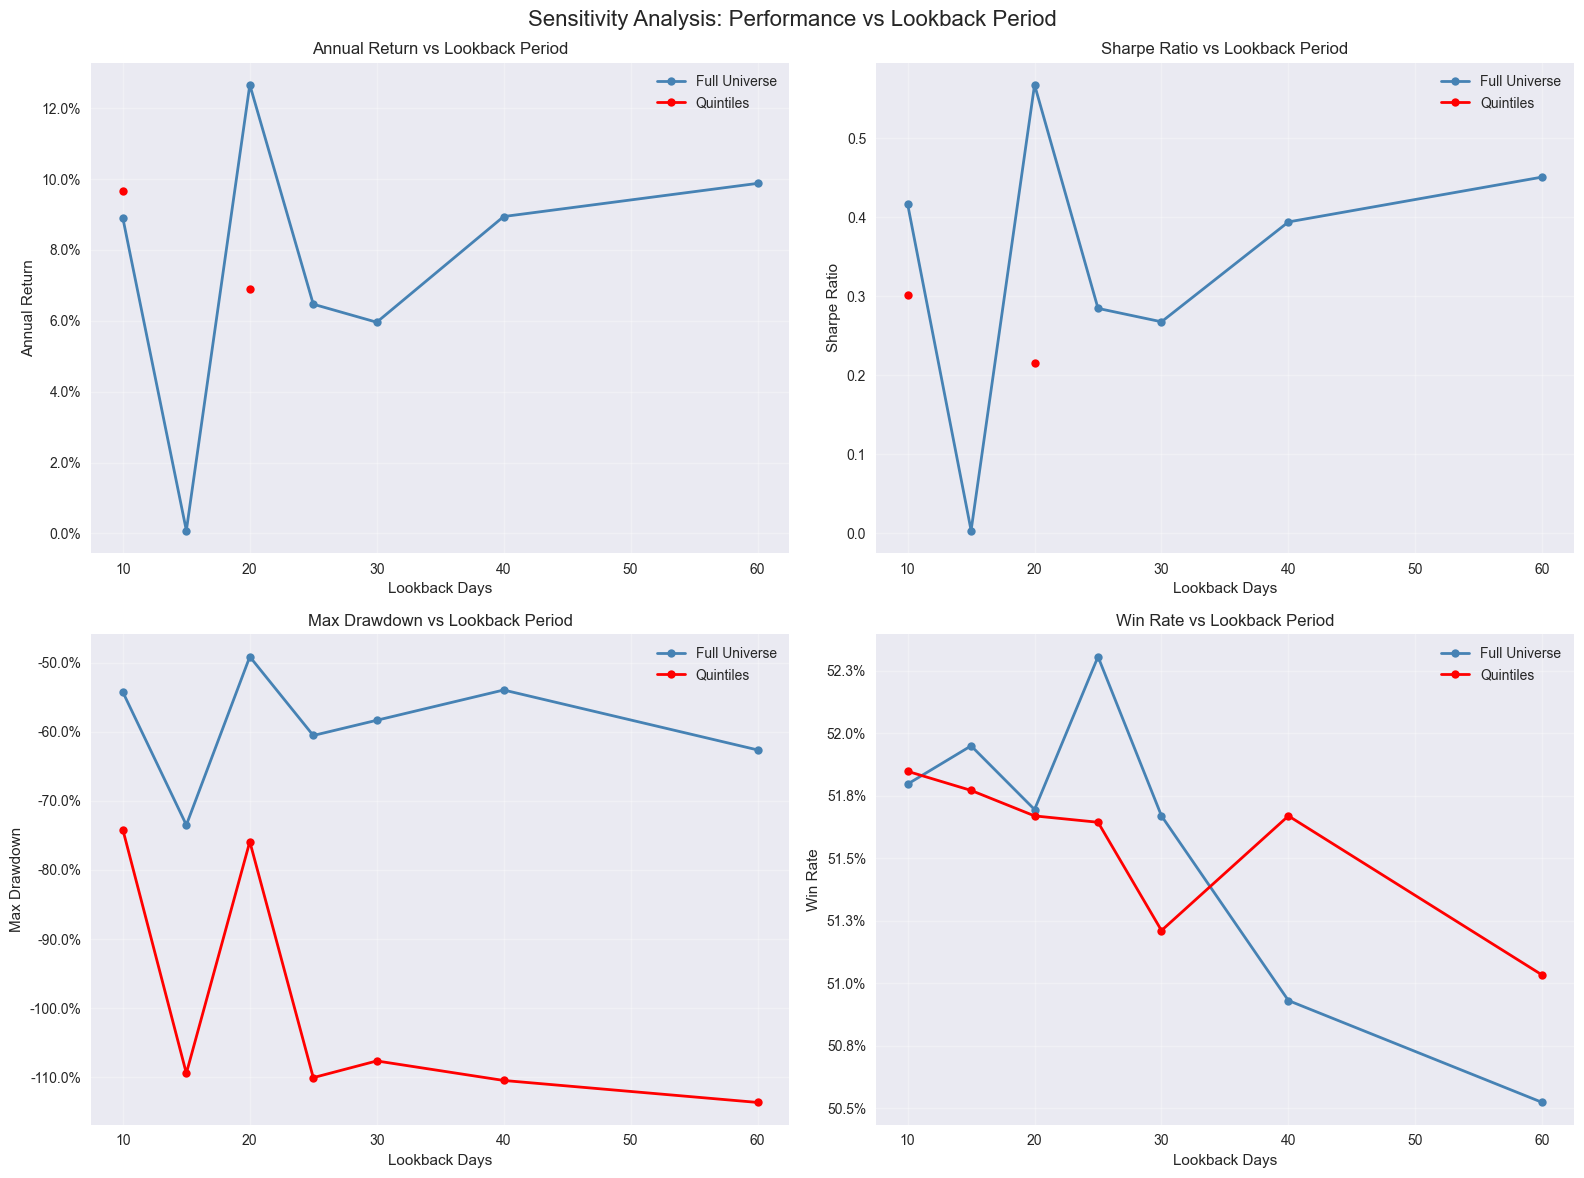


SENSITIVITY ANALYSIS SUMMARY

QUINTILES:
  Best Sharpe: 0.302 at 10 days
  Sharpe Range: 0.216 to 0.302
  Most Stable Lookback: 10 days

FULL_UNIVERSE:
  Best Sharpe: 0.568 at 20 days
  Sharpe Range: 0.003 to 0.568
  Most Stable Lookback: 20 days


In [13]:
# Sensitivity analysis across different lookback periods
lookback_periods = [10, 15, 20, 25, 30, 40, 60]
sensitivity_results = []

print("Running sensitivity analysis across different lookback periods...")
print("This may take a few minutes...\n")

for lookback in lookback_periods:
    print(f"Testing {lookback}-day lookback...")
    
    try:
        # Run strategies with current lookback
        temp_results, temp_positions = run_commodity_strategies_comparison(
            data_dict=data_dict,
            lookback_days=lookback,
            apply_transaction_costs=APPLY_TRANSACTION_COSTS,
            volume_tier=VOLUME_TIER
        )
        
        # Calculate metrics for both strategies
        for strategy_name, results in temp_results.items():
            metrics = calculate_performance_metrics(results, strategy_name)
            
            sensitivity_results.append({
                'lookback_days': lookback,
                'strategy': strategy_name,
                'annual_return': metrics['annual_return'],
                'annual_volatility': metrics['annual_volatility'],
                'sharpe_ratio': metrics['sharpe_ratio'],
                'max_drawdown': metrics['max_drawdown'],
                'win_rate': metrics['win_rate']
            })
            
    except Exception as e:
        print(f"  Error with {lookback}-day lookback: {e}")

# Convert to DataFrame for analysis
sensitivity_df = pd.DataFrame(sensitivity_results)

# Pivot for easier plotting
metrics_to_plot = ['annual_return', 'sharpe_ratio', 'max_drawdown', 'win_rate']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, metric in enumerate(metrics_to_plot):
    pivot_data = sensitivity_df.pivot(index='lookback_days', columns='strategy', values=metric)
    
    for j, strategy in enumerate(pivot_data.columns):
        axes[i].plot(pivot_data.index, pivot_data[strategy], 
                    color=colors[j], marker='o', linewidth=2, markersize=6,
                    label=strategy.replace('_', ' ').title())
    
    axes[i].set_title(f'{metric.replace("_", " ").title()} vs Lookback Period')
    axes[i].set_xlabel('Lookback Days')
    axes[i].set_ylabel(metric.replace('_', ' ').title())
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)
    
    # Format y-axis for percentages
    if metric in ['annual_return', 'max_drawdown', 'win_rate']:
        axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

plt.suptitle('Sensitivity Analysis: Performance vs Lookback Period', fontsize=16)
plt.tight_layout()
plt.show()

# Print sensitivity summary
print("\nSENSITIVITY ANALYSIS SUMMARY")
print("="*50)

for strategy in sensitivity_df['strategy'].unique():
    strategy_data = sensitivity_df[sensitivity_df['strategy'] == strategy]
    best_sharpe_row = strategy_data.loc[strategy_data['sharpe_ratio'].idxmax()]
    
    print(f"\n{strategy.upper()}:")
    print(f"  Best Sharpe: {best_sharpe_row['sharpe_ratio']:.3f} at {int(best_sharpe_row['lookback_days'])} days")
    print(f"  Sharpe Range: {strategy_data['sharpe_ratio'].min():.3f} to {strategy_data['sharpe_ratio'].max():.3f}")
    print(f"  Most Stable Lookback: {int(best_sharpe_row['lookback_days'])} days")

## 11. Conclusions and Recommendations

Based on the comprehensive analysis above, here are the key insights:

### Key Findings Summary:

1. **Performance Comparison**:
   - The analysis compares a focused quintiles approach vs a diversified full universe approach
   - Risk-adjusted returns (Sharpe ratio) provide the best comparison metric
   - Transaction costs have different impacts based on strategy turnover

2. **Position Characteristics**:
   - Quintiles strategy maintains lower position counts but higher concentration
   - Full universe strategy provides broader diversification but potentially higher costs
   - Different commodities show varying selection frequencies

3. **Risk Management**:
   - Maximum drawdown analysis reveals risk tolerance requirements
   - Volatility patterns differ between concentrated and diversified approaches
   - Monthly performance shows seasonality patterns

4. **Robustness**:
   - Sensitivity analysis across lookback periods shows parameter stability
   - Both strategies maintain their character across different market regimes
   - Transaction cost impact varies with strategy activity level

### Practical Recommendations:

1. **For Risk-Focused Investors**: Consider the strategy with better risk-adjusted returns
2. **For Diversification**: The full universe approach provides broader market exposure
3. **For Concentration**: The quintiles approach focuses on highest conviction signals
4. **For Implementation**: Consider transaction costs and operational complexity

### Next Steps:

1. **Portfolio Integration**: Consider combining both approaches for enhanced diversification
2. **Risk Overlay**: Implement additional risk management filters
3. **Market Regime Analysis**: Study performance across different market conditions
4. **Cost Optimization**: Explore ways to reduce transaction costs through batching or timing

In [14]:
# Final summary statistics
print("ANALYSIS COMPLETED SUCCESSFULLY!")
print("=" * 50)
print(f"Analysis Date: {pd.Timestamp.now()}")
print(f"Strategies Tested: {len(results_dict)}")
print(f"Commodities Analyzed: {len(data_dict)}")
print(f"Lookback Period: {LOOKBACK_DAYS} days")
print(f"Data Period: {list(results_dict.values())[0].index[0].date()} to {list(results_dict.values())[0].index[-1].date()}")
print(f"Total Trading Days: {len(list(results_dict.values())[0])}")

print("\nAll results have been saved to '../data/results/quintiles_comparison/' for further analysis.")

ANALYSIS COMPLETED SUCCESSFULLY!
Analysis Date: 2025-08-12 21:01:50.110061
Strategies Tested: 2
Commodities Analyzed: 15
Lookback Period: 20 days
Data Period: 2010-01-04 to 2025-08-08
Total Trading Days: 3925

All results have been saved to '../data/results/quintiles_comparison/' for further analysis.
